<a href="https://colab.research.google.com/github/JerinJoe/DAI-LAB/blob/main/binary_classification_(Heart_disease).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler   
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import files
files.upload()

Saving heart.csv to heart.csv


{'heart.csv': b'age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target\r\n52,1,0,125,212,0,1,168,0,1,2,2,3,0\r\n53,1,0,140,203,1,0,155,1,3.1,0,0,3,0\r\n70,1,0,145,174,0,1,125,1,2.6,0,0,3,0\r\n61,1,0,148,203,0,1,161,0,0,2,1,3,0\r\n62,0,0,138,294,1,1,106,0,1.9,1,3,2,0\r\n58,0,0,100,248,0,0,122,0,1,1,0,2,1\r\n58,1,0,114,318,0,2,140,0,4.4,0,3,1,0\r\n55,1,0,160,289,0,0,145,1,0.8,1,1,3,0\r\n46,1,0,120,249,0,0,144,0,0.8,2,0,3,0\r\n54,1,0,122,286,0,0,116,1,3.2,1,2,2,0\r\n71,0,0,112,149,0,1,125,0,1.6,1,0,2,1\r\n43,0,0,132,341,1,0,136,1,3,1,0,3,0\r\n34,0,1,118,210,0,1,192,0,0.7,2,0,2,1\r\n51,1,0,140,298,0,1,122,1,4.2,1,3,3,0\r\n52,1,0,128,204,1,1,156,1,1,1,0,0,0\r\n34,0,1,118,210,0,1,192,0,0.7,2,0,2,1\r\n51,0,2,140,308,0,0,142,0,1.5,2,1,2,1\r\n54,1,0,124,266,0,0,109,1,2.2,1,1,3,0\r\n50,0,1,120,244,0,1,162,0,1.1,2,0,2,1\r\n58,1,2,140,211,1,0,165,0,0,2,0,2,1\r\n60,1,2,140,185,0,0,155,0,3,1,0,2,0\r\n67,0,0,106,223,0,1,142,0,0.3,2,2,2,1\r\n45,1,0,104,208,0,0,148,1,3,1,0,2,1\

In [ ]:
df=pd.read_csv("heart.csv")

In [ ]:
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


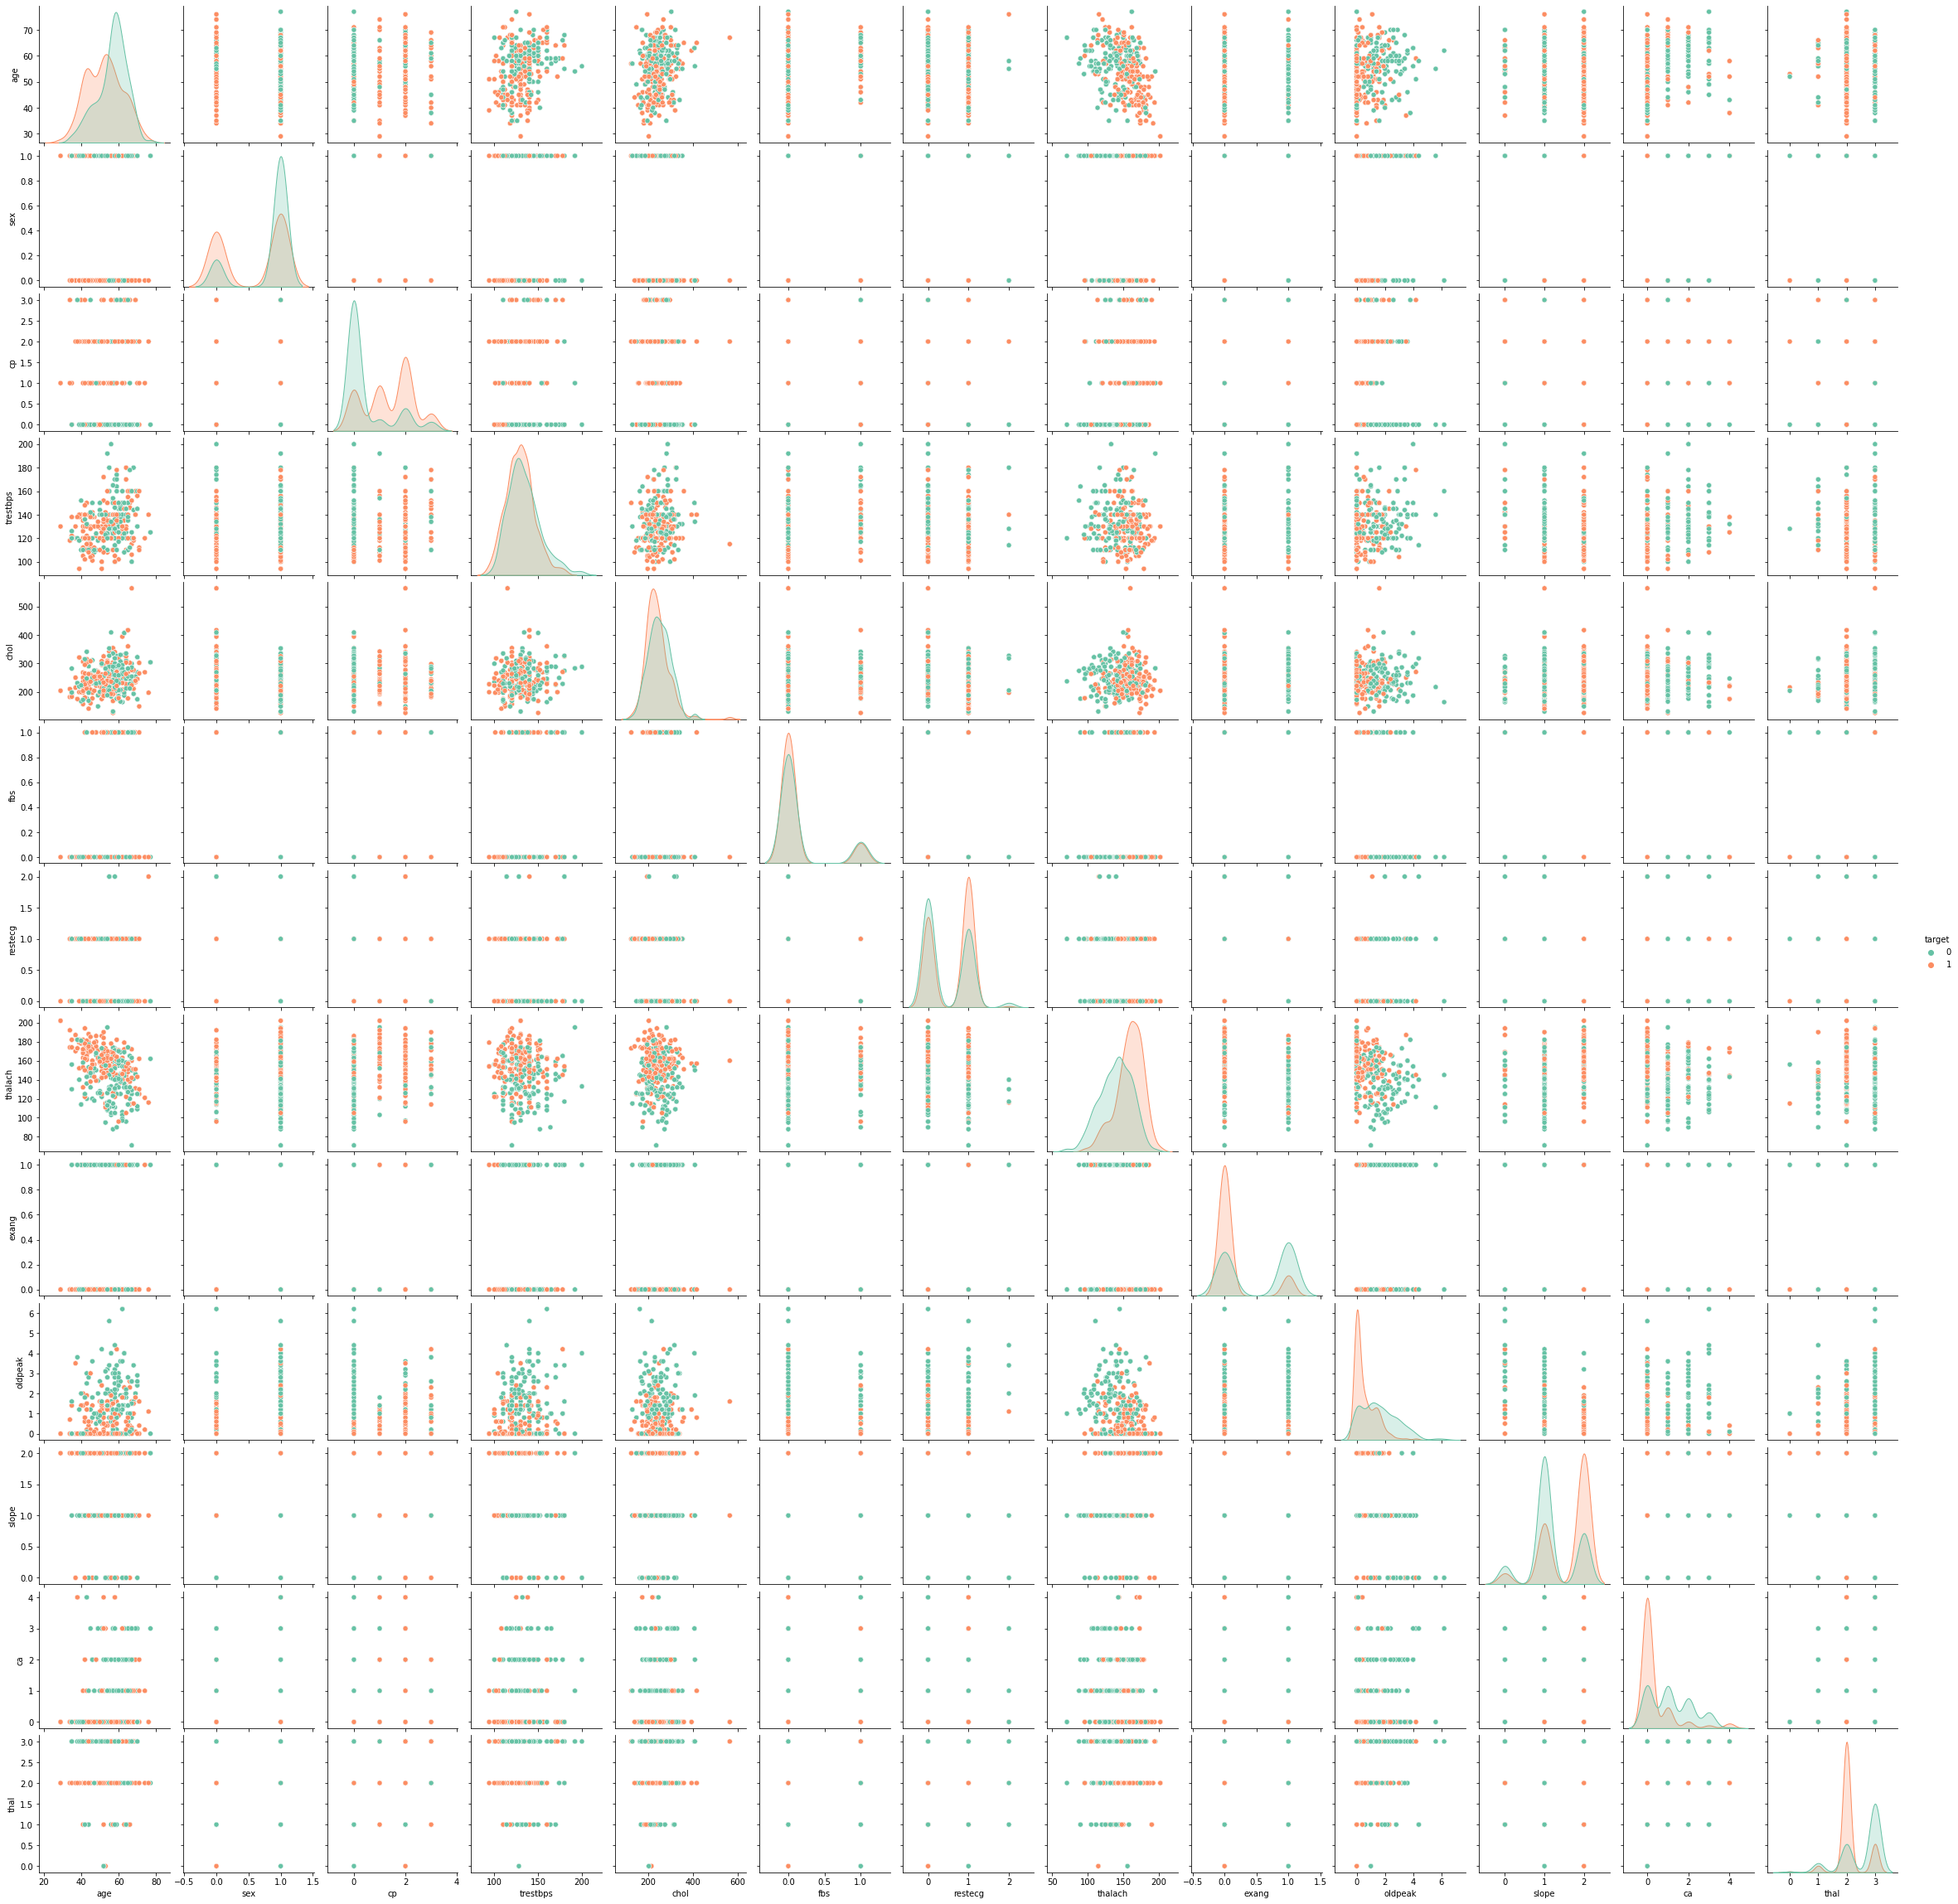

In [ ]:
sns.pairplot(data=df, hue='target', palette='Set2')

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.25,random_state=0)

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, Y_train)  

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred=classifier.predict(X_test)


In [ ]:
y_pred


array([1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1])

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
 


In [ ]:
cm=confusion_matrix(Y_test,y_pred)

<AxesSubplot:>

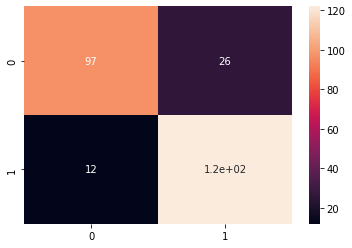

In [ ]:
sns.heatmap(cm,annot=True)

In [ ]:
print(accuracy_score(Y_test,y_pred))

0.8521400778210116
